## DL2 - Question 4
#### Run the same code without scaling the imagesand check the performance
(https://umkc.box.com/s/10nrlk6216fncengv7qxbbw5o9vgc3hs

In [1]:
# Importing the libraries
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

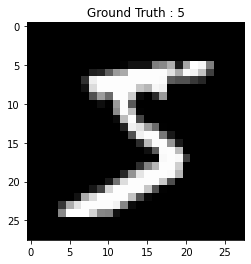

In [2]:
#loading the train and test data 
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [5]:
#change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(300, activation='tanh'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 22s 95ms/step - loss: 0.5040 - accuracy: 0.8572 - val_loss: 0.2130 - val_accuracy: 0.9364
Epoch 2/20
235/235 [==============================] - 21s 91ms/step - loss: 0.2049 - accuracy: 0.9383 - val_loss: 0.1961 - val_accuracy: 0.9414
Epoch 3/20
235/235 [==============================] - 20s 87ms/step - loss: 0.1685 - accuracy: 0.9495 - val_loss: 0.1618 - val_accuracy: 0.9511
Epoch 4/20
235/235 [==============================] - 21s 88ms/step - loss: 0.1554 - accuracy: 0.9531 - val_loss: 0.2390 - val_accuracy: 0.9293
Epoch 5/20
235/235 [==============================] - 21s 89ms/step - loss: 0.1541 - accuracy: 0.9534 - val_loss: 0.2401 - val_accuracy: 0.9192
Epoch 6/20
235/235 [==============================] - 20s 86ms/step - loss: 0.1446 - accuracy: 0.9565 - val_loss: 0.2372 - val_accuracy: 0.9244
Epoch 7/20
235/235 [==============================] - 21s 88ms/step - loss: 0.1373 - accuracy: 0.9586 - val_loss: 0.1805 - val_accuracy:

In [8]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.1271 - accuracy: 0.9628
Evaluation result on Test Data : Loss = 0.12711505591869354, accuracy = 0.9628000259399414


In [9]:
#Listing all the data in history (Call Backs)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


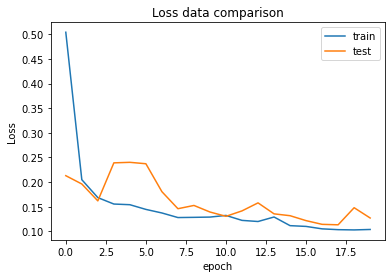

In [13]:
# Plotting the loss for both training data and validation data using the history object.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss data comparison')
plt.legend(['train', 'test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

#### Observations :
Loss of the model is around 12 %

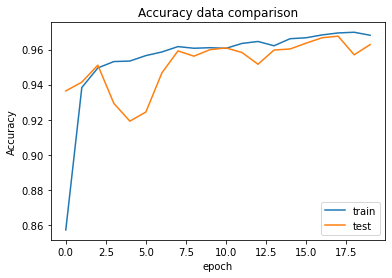

In [14]:
# Plotting the Accuracy for both training data and validation data using the history object.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('Accuracy data comparison')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

#### Observations :
Accuracy of the model is around 96 %

## Conclusions without doing scaling:
1. Loss was increased from 10% to 12%
2. Accuracy was reduced to 96% from 98%